In [105]:
#!pip install pennylane

In [106]:
#du/dx - cos(x) = 0

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import math

rng = np.random.default_rng(seed=20)


In [107]:
n_wires=6
n_layers=3
load_filename='t1.npy'
save_filename='t1_prime.npy'
dev = qml.device('default.qubit', wires=n_wires)
loaded_params = np.load(load_filename)
print("Loaded parameters:", loaded_params)

Loaded parameters: [[[ 7.92584000e-01  4.96577578e-01  8.37177042e-01]
  [ 1.38276104e+00  3.17091963e-01  1.31062160e+00]
  [ 6.88898411e-01  1.58963135e+00  1.35568209e+00]
  [ 1.20298708e+00 -3.08182231e-02 -2.13950015e-01]
  [ 2.00370205e-01  1.40889514e+00  7.17912895e-01]
  [ 1.19105137e+00 -2.44736755e-01  7.34317968e-01]]

 [[ 9.90709265e-01  1.73111362e-01  9.10081104e-01]
  [ 2.42752426e-01  2.53181926e-01  8.80110991e-01]
  [ 2.78517236e-02 -1.73272272e-01  1.34624995e+00]
  [ 1.58273495e+00  2.13853515e-01  1.65867505e-01]
  [-7.87294873e-01  4.30168445e-01  8.16436361e-01]
  [ 1.10474445e+00  9.51624167e-02  3.96605144e-01]]

 [[ 6.50901271e-01  5.22517705e-01  3.57765485e-01]
  [ 6.69503303e-01  6.10103196e-01  5.11909830e-01]
  [ 9.34240159e-01  1.55753642e-01  6.27905706e-01]
  [ 9.44619540e-01  6.07381587e-04  6.43282023e-01]
  [ 7.82369448e-01  6.54766215e-01  6.07836611e-01]
  [-2.45987576e-02  3.99719470e-01  4.65603022e-01]]

 [[ 3.48967112e-01  3.45820436e-01  9.9

In [108]:
def phi(x, j):  # Chebyshev
    return 2 * j * np.arccos(x)

def dphi1(x,j):
    return 2*j*(-1 / np.sqrt(1 - x ** 2))

def dphi2(x,j):
    return 2*j*(-x / ((1 - x ** 2) ** (3 / 2)))

In [109]:
@qml.qnode(dev)
def u_x(x,parameters):
    # feature map
    for j in range(n_wires):
        qml.RY(phi=phi(x,j+1),wires=j)
    # ansatz
    qml.StronglyEntanglingLayers(weights=parameters, wires=range(dev.num_wires)) 
    # Cost function <Z>
    return qml.expval(qml.PauliZ(0))

# shape = qml.StronglyEntanglingLayers.shape(n_layers=2, n_wires=n_wires)
# w = rng.random(size=shape)
# print(qml.draw(u_x)(0.1,w))

In [110]:



@qml.qnode(dev, diff_method="parameter-shift")
def du_x_helper(phi_x_vector,parameters):
    # feature map
    for j in range(n_wires):
        qml.RY(phi_x_vector[j],wires=j)
    # ansatz
    qml.StronglyEntanglingLayers(weights=parameters, wires=range(dev.num_wires)) 
    # Cost function <Z>
    return qml.expval(qml.PauliZ(0))





def du_x(x,parameters):
    phi_x=['Nan']*n_wires
    dphi_x=['Nan']*n_wires
    for j in range(n_wires):
        phi_x[j] = phi(x,j)
        dphi_x[j] = dphi1(x,j)
    # phi_x = np.array(phi_x,requires_grad=True)
    dphi_x = np.array(dphi_x)
    # parameters_nograd = np.array(parameters,requires_grad=False)
    grads=qml.grad(du_x_helper,argnum=(0))(phi_x,parameters)   
    # print(grads)
    # raise Excepti
    grad_dphi = grads*dphi_x 
    return 0.5*np.sum(grad_dphi)

        
# shape = qml.StronglyEntanglingLayers.shape(n_layers=1, n_wires=n_wires)#TODO:// dynamic
# params = rng.random(size=shape)
# sample_x = np.linspace(0.1, 0.9, 10, endpoint=True)
# for x in sample_x:
#     print(du_x(x,parameters=params))

# raise Exception()
# shape = qml.StronglyEntanglingLayers.shape(n_layers=1, n_wires=n_wires)#TODO:// dynamic
# params = rng.random(size=shape)
# print(params)
# print(qml.grad(du_x)(0.1,params))
# raise Exception('haha')

In [111]:
sample_x = np.linspace(0.1, 0.9, 100, endpoint=True)
sample_x

tensor([0.1       , 0.10808081, 0.11616162, 0.12424242, 0.13232323,
        0.14040404, 0.14848485, 0.15656566, 0.16464646, 0.17272727,
        0.18080808, 0.18888889, 0.1969697 , 0.20505051, 0.21313131,
        0.22121212, 0.22929293, 0.23737374, 0.24545455, 0.25353535,
        0.26161616, 0.26969697, 0.27777778, 0.28585859, 0.29393939,
        0.3020202 , 0.31010101, 0.31818182, 0.32626263, 0.33434343,
        0.34242424, 0.35050505, 0.35858586, 0.36666667, 0.37474747,
        0.38282828, 0.39090909, 0.3989899 , 0.40707071, 0.41515152,
        0.42323232, 0.43131313, 0.43939394, 0.44747475, 0.45555556,
        0.46363636, 0.47171717, 0.47979798, 0.48787879, 0.4959596 ,
        0.5040404 , 0.51212121, 0.52020202, 0.52828283, 0.53636364,
        0.54444444, 0.55252525, 0.56060606, 0.56868687, 0.57676768,
        0.58484848, 0.59292929, 0.6010101 , 0.60909091, 0.61717172,
        0.62525253, 0.63333333, 0.64141414, 0.64949495, 0.65757576,
        0.66565657, 0.67373737, 0.68181818, 0.68

In [112]:
def calculate_loss_boundry(parameters,err="MSE"):
    #boundry for u(x)=sin(x), u(0)=0, u(pi/2)=1
    x = [0.1,0.9]
    u = [0.1,0.78]
    u_predict=[0,0]
    error = None
    for i in range(len(x)):
        u_predict[i]=u_x(x=x[i],parameters=parameters)

    if err=="MSE":
        #MSE
        error = np.mean((np.array(u_predict) - np.array(u))**2)
    else:
        raise Exception('Not implemented yet')
    return error
# calculate_loss_boundry(weights)

In [113]:
np.cos(sample_x)

tensor([0.99500417, 0.99416495, 0.99326082, 0.99229183, 0.99125805,
        0.99015953, 0.98899636, 0.98776861, 0.98647636, 0.9851197 ,
        0.9836987 , 0.98221347, 0.98066411, 0.9790507 , 0.97737337,
        0.97563221, 0.97382735, 0.97195889, 0.97002697, 0.96803171,
        0.96597323, 0.96385168, 0.96166719, 0.9594199 , 0.95710996,
        0.95473753, 0.95230275, 0.94980579, 0.9472468 , 0.94462596,
        0.94194344, 0.93919941, 0.93639405, 0.93352755, 0.93060009,
        0.92761185, 0.92456305, 0.92145388, 0.91828453, 0.91505522,
        0.91176616, 0.90841756, 0.90500964, 0.90154263, 0.89801674,
        0.89443222, 0.89078929, 0.88708819, 0.88332917, 0.87951247,
        0.87563833, 0.87170702, 0.86771878, 0.86367389, 0.85957259,
        0.85541517, 0.85120189, 0.84693302, 0.84260886, 0.83822967,
        0.83379574, 0.82930737, 0.82476485, 0.82016847, 0.81551853,
        0.81081534, 0.80605921, 0.80125044, 0.79638935, 0.79147625,
        0.78651148, 0.78149534, 0.77642817, 0.77

In [114]:
def calculate_loss_interior(parameters,err="MSE"):
    # sample_ux = np.sin(sample_x)
    du_x_res=np.array([0.0]*len(sample_x))
    rhs = np.zeros(len(sample_x))
    error = None
    for i in range(len(sample_x)):
        du_x_res[i]=du_x(x=sample_x[i],parameters=parameters)
    lhs = du_x_res-np.cos(sample_x)
    if err=="MSE":
        #MSE
        error = np.mean((lhs - rhs)**2)
    else:
        raise Exception('Not implemented yet')
    # print(error)
    return error

# shape = qml.StronglyEntanglingLayers.shape(n_layers=2, n_wires=n_wires)#TODO:// dynamic
# params = rng.random(size=shape)
# calculate_loss_interior(params)

In [115]:


def loss_func(params,l_b=0.3,l_i=0.7):
    # print('hhhhhhhhhhhhhhhh')
    shape = qml.StronglyEntanglingLayers.shape(n_layers=n_layers, n_wires=n_wires)#TODO:// dynamic
    param2 = params.reshape(shape)
    # print(param2)
    loss= l_b*calculate_loss_boundry(param2)+l_i*calculate_loss_interior(param2)
    # return np.min(params)
    # loss = l_i*calculate_loss_interior(param2)
    return loss

In [116]:
def plot_u_predict(params):

    shape = qml.StronglyEntanglingLayers.shape(n_layers=n_layers, n_wires=n_wires)#TODO:// dynamic
    param2 = params.reshape(shape)
    # param2=params

    sample_u = np.sin(sample_x)
    sample_u_predict = []
    for x in sample_x:
        sample_u_predict.append(u_x(x, param2))  # Assuming u_x is defined elsewhere

    plt.plot(sample_x, sample_u, 'bo-', label='Actual')
    plt.plot(sample_x, sample_u_predict, 'r*-', label='Predicted')
    plt.xlabel('x')
    plt.ylabel('sin(x)')
    plt.title('Plot of sin(x)')
    plt.legend()
    plt.grid(True)
    plt.show()
# plot_u_predict()

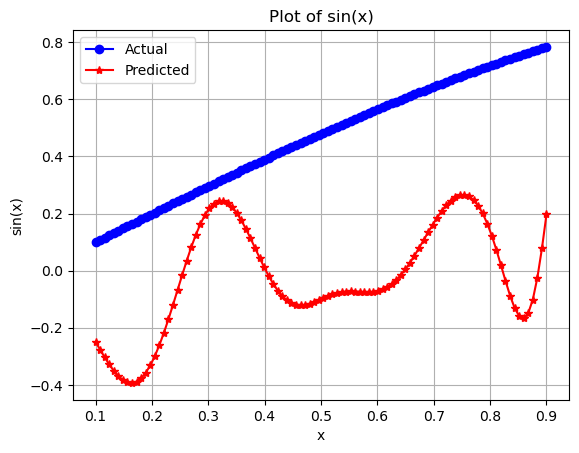

/tmp/ipykernel_18337/180061783.py:25: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  result = minimize(loss_func, x0, method='L-BFGS-B', callback=callback)


KeyboardInterrupt: 

In [117]:
import numpy as np
from scipy.optimize import minimize



# Define the callback function to print the current cost during optimization
def callback(x):
    print('callback')
    print(loss_func(x))
    np.save('pars3.npy', x)
    plot_u_predict(x)
    

# Initial guess
shape = qml.StronglyEntanglingLayers.shape(n_layers=n_layers, n_wires=n_wires)#TODO:// dynamic
params = rng.random(size=shape)
# print(params)
# params=loaded_params
# print(params)
x0 = params

plot_u_predict(params)

# Perform the optimization
result = minimize(loss_func, x0, method='L-BFGS-B', callback=callback)

# Print the optimized parameters
print(f"Optimized parameters: {result.x}")
print(f"Optimized cost: {result.fun}")

In [ ]:
# shape = qml.StronglyEntanglingLayers.shape(n_layers=n_layers, n_wires=n_wires)#TODO:// dynamic
# params = rng.random(size=shape)
# # print(params)
# # params = loaded_params
# # opt = qml.GradientDescentOptimizer() #TODO:// ADAM
# opt = qml.AdamOptimizer(0.05, beta1=0.9, beta2=0.999)


# print('starting plot:')
# plot_u_predict(params)
# for i in range(400):
#     print(i)
#     params, loss = opt.step_and_cost(loss_func, params)
#     # print(params)
#     if i%1==0:
#         # print("Step ", i, "\n params = ", params,' loss = ',loss)
#         print("Step ", i, "\n params = ", None,' loss = ',loss)
#         # plot_u_predict(params)
    

        

In [ ]:
# print(params)
# np.save("optimized_params_sin_prime.npy", params)
# loaded_params = np.load("optimized_params.npy")
# print("Loaded parameters:", loaded_params)

In [ ]:
plot_u_predict(loaded_params)
sample_x = np.linspace(0, 1, 10, endpoint=True)
print(sample_x)
x=0.29
print(np.sin(x))
print(u_x(parameters=loaded_params,x=x))
